In [139]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, roc_auc_score

In [140]:
df= pd.read_csv('train.csv')
df.head()

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,1,13,7.0,winner,team1,8,7.0,7.0,0.317073,0.48,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,3,16,6.5,loser,team2,8,3.0,9.0,0.463415,0.42,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,4,8.5,loser,team1,5,11.0,11.0,0.682927,0.44,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,5,13,8.0,loser,team2,4,17.0,17.0,0.682927,0.58,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,7,11,3.5,draw,team1,5,10.0,10.0,0.731707,0.70,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500


In [141]:
df.shape

(20453, 800)

In [142]:
list(df.columns)

['row_id',
 'scout_id',
 'rating_num',
 'winner',
 'team',
 'competitionId',
 'player_position_1',
 'player_position_2',
 'player_height',
 'player_weight',
 'player_general_var_0',
 'player_general_var_1',
 'player_general_var_2',
 'player_general_var_3',
 'player_general_var_4',
 'player_general_var_5',
 'player_positional_raw_var_0',
 'player_positional_raw_var_1',
 'player_positional_raw_var_2',
 'player_positional_raw_var_3',
 'player_defensive_raw_var_4',
 'player_defensive_raw_var_5',
 'player_other_raw_var_6',
 'player_offensive_raw_var_7',
 'player_other_raw_var_8',
 'player_other_raw_var_9',
 'player_other_raw_var_10',
 'player_offensive_raw_var_11',
 'player_other_raw_var_12',
 'player_other_raw_var_13',
 'player_other_raw_var_14',
 'player_positional_raw_var_15',
 'player_positional_raw_var_16',
 'player_positional_raw_var_17',
 'player_other_raw_var_18',
 'player_other_raw_var_19',
 'player_other_raw_var_20',
 'player_positional_raw_var_21',
 'player_positional_raw_var_22'

In [143]:
df.team1_system_id.value_counts(dropna=False)

6.0     4463
10.0    3709
8.0     2939
NaN     1398
21.0    1389
12.0    1278
18.0     994
14.0     977
17.0     605
7.0      438
11.0     349
9.0      341
15.0     326
27.0     324
19.0     271
13.0     201
4.0      127
22.0     103
20.0     103
5.0       62
26.0      25
28.0      16
23.0      13
25.0       2
Name: team1_system_id, dtype: int64

In [144]:
df.team2_system_id.value_counts(dropna=False)

6.0     4695
10.0    3218
8.0     2840
21.0    1448
NaN     1427
12.0    1177
14.0    1111
18.0     892
17.0     722
7.0      599
15.0     429
19.0     325
27.0     316
13.0     305
9.0      258
11.0     183
20.0     152
5.0      124
4.0      119
22.0      72
23.0      21
26.0      10
28.0      10
Name: team2_system_id, dtype: int64

In [145]:
df.isnull().sum()

row_id                               0
scout_id                             0
rating_num                           0
winner                               0
team                                 0
                                  ... 
team2_defensive_derived_var_15    1427
team2_offensive_derived_var_16    1427
team2_defensive_derived_var_17    1427
team2_offensive_derived_var_18    1427
team2_offensive_derived_var_19    1427
Length: 800, dtype: int64

In [146]:
cols = ['row_id','scout_id','rating_num','winner','team','competitionId','player_position_1',
 'player_position_2',
 'player_height',
 'player_weight','team1_system_id','team2_system_id']

In [147]:
df[cols].isnull().sum()

row_id                  0
scout_id                0
rating_num              0
winner                  0
team                    0
competitionId           0
player_position_1      75
player_position_2      75
player_height           2
player_weight           2
team1_system_id      1398
team2_system_id      1427
dtype: int64

## filling the null values for player_position_1 & player_position_2

In [148]:
df_null_position = df[(df.player_position_1.isnull()) | (df.player_position_2.isnull())]

In [149]:
df = df[~((df.player_position_1.isnull()) | (df.player_position_2.isnull()))]

In [150]:
df.shape

(20378, 800)

In [151]:
df_position_1 = df.groupby(['winner','team','competitionId'])['player_position_1'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

In [152]:
df_position_2 = df.groupby(['winner','team','competitionId'])['player_position_2'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

In [153]:
df_position_1

,winner,team,competitionId,player_position_1
0,draw,team1,4,3.0
1,draw,team1,5,3.0
2,draw,team1,6,3.0
3,draw,team1,7,3.0
4,draw,team1,8,11.0
5,draw,team1,9,3.0
6,draw,team1,10,3.0
7,draw,team1,11,3.0
8,draw,team1,14,4.0
9,draw,team1,15,1.0


In [154]:
df_x = df_null_position.merge(df_position_1, on =['winner','team','competitionId'], how='left')
df_x.head()

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1_x,player_position_2,player_height,player_weight,...,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19,player_position_1_y
0,388,14,7.5,winner,team2,14,NaN,NaN,0.243902,0.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
1,1585,16,6.0,loser,team1,14,NaN,NaN,0.341463,0.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
2,2867,16,6.5,winner,team2,14,NaN,NaN,0.146341,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
3,3130,14,7.5,loser,team2,14,NaN,NaN,0.365854,0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,3680,11,9.0,loser,team1,6,NaN,NaN,0.439024,0.34,...,0.173234,NaN,0.685117,0.49398,0.63478,0.204472,0.438725,0.428837,0.223435,3.0


In [155]:
df_y = df_x.merge(df_position_2, on =['winner','team','competitionId'], how='left')
df_y

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1_x,player_position_2_x,player_height,player_weight,...,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19,player_position_1_y,player_position_2_y
0,388,14,7.5,winner,team2,14,NaN,NaN,0.243902,0.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.0
1,1585,16,6.0,loser,team1,14,NaN,NaN,0.341463,0.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0
2,2867,16,6.5,winner,team2,14,NaN,NaN,0.146341,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.0
3,3130,14,7.5,loser,team2,14,NaN,NaN,0.365854,0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0
4,3680,11,9.0,loser,team1,6,NaN,NaN,0.439024,0.34,...,NaN,0.685117,0.493980,0.634780,0.204472,0.438725,0.428837,0.223435,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,28220,14,5.0,loser,team1,14,NaN,NaN,0.414634,0.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0
71,28656,3,6.0,draw,team2,10,NaN,NaN,0.414634,0.34,...,0.000000,0.477430,0.529599,0.624406,0.032234,0.360846,0.336695,0.244813,11.0,11.0
72,28765,14,6.0,draw,team2,14,NaN,NaN,0.146341,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.0
73,28797,3,6.0,winner,team1,11,NaN,NaN,0.609756,0.46,...,0.123251,0.768623,0.206687,0.351910,0.064120,0.401201,0.303829,0.437477,11.0,11.0


In [156]:
df_y.drop(columns=['player_position_1_x','player_position_2_x'], axis =1, inplace=True)
df_y.rename(columns= {'player_position_1_y':'player_position_1','player_position_2_y':'player_position_2'},inplace=True)

In [157]:
df_y = df_y[list(df.columns)]

In [158]:
df_y

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,388,14,7.5,winner,team2,14,17.0,17.0,0.243902,0.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1585,16,6.0,loser,team1,14,8.0,8.0,0.341463,0.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2867,16,6.5,winner,team2,14,17.0,17.0,0.146341,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3130,14,7.5,loser,team2,14,3.0,2.0,0.365854,0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3680,11,9.0,loser,team1,6,3.0,3.0,0.439024,0.34,...,0.394285,0.173234,NaN,0.685117,0.493980,0.634780,0.204472,0.438725,0.428837,0.223435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,28220,14,5.0,loser,team1,14,8.0,8.0,0.414634,0.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,28656,3,6.0,draw,team2,10,11.0,11.0,0.414634,0.34,...,0.591401,0.124634,0.000000,0.477430,0.529599,0.624406,0.032234,0.360846,0.336695,0.244813
72,28765,14,6.0,draw,team2,14,17.0,17.0,0.146341,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,28797,3,6.0,winner,team1,11,11.0,11.0,0.609756,0.46,...,0.258710,0.133359,0.123251,0.768623,0.206687,0.351910,0.064120,0.401201,0.303829,0.437477


In [159]:
df=pd.concat([df,df_y])

In [160]:
df['competitionId'].value_counts()

8     3750
7     3656
4     3015
5     2829
11    2086
10    1653
9     1628
6     1511
14     317
15       8
Name: competitionId, dtype: int64

In [161]:
df['rating_num'].value_counts()

6.0     3654
6.5     3247
7.5     3206
10.0    2442
5.0     2244
7.0     1248
3.5     1077
8.5     1062
9.0     1023
8.0      873
0.0      218
3.0      110
2.0       49
Name: rating_num, dtype: int64

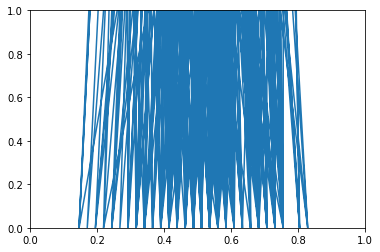

In [162]:
plt.plot(df['player_height'],df['rating_num'],scalex=False, scaley=False)

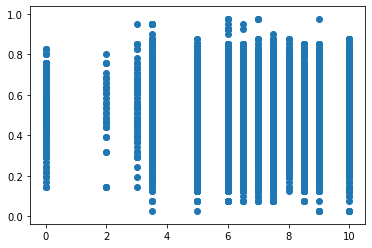

In [163]:
plt.scatter(df['rating_num'],df['player_height'])

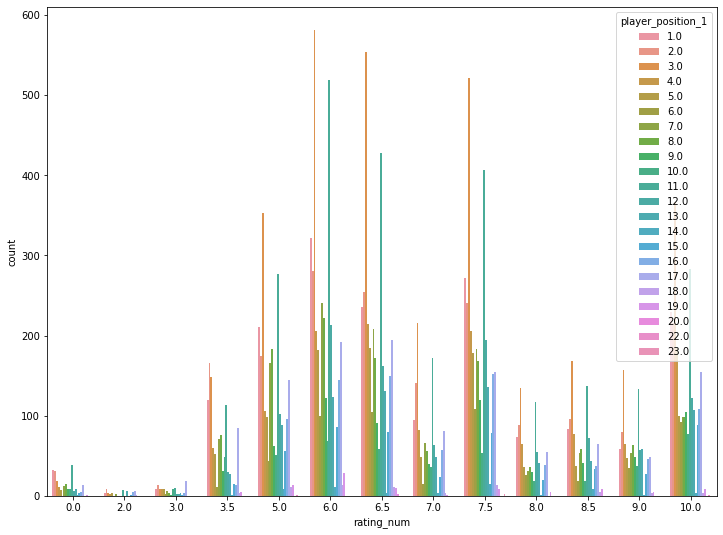

In [164]:
plt.figure(figsize=(12,9))
sns.countplot(data=df,x='rating_num',hue='player_position_1')

In [165]:
# fin_df = pd.DataFrame()
# grp_df=df.groupby(['rating_num']).apply(pd.DataFrame.mode)[['player_position_1','player_position_2']].reset_index()
# for i in df.rating_num.unique():
#     a=grp_df[grp_df['rating_num']==i].head(1)
#     fin_df=pd.concat([fin_df,a])

## filling the null values for player_height and player_weight

In [166]:
df[cols].isnull().sum()

row_id                  0
scout_id                0
rating_num              0
winner                  0
team                    0
competitionId           0
player_position_1       0
player_position_2       0
player_height           2
player_weight           2
team1_system_id      1398
team2_system_id      1427
dtype: int64

In [167]:
# replacing the null values with mean of 'player_height' column for each unique value in rating_num

for i in df.player_position_2.unique():
    df.loc[(df['player_position_2']==i) & (df['player_height'].isnull()),'player_height'] = df[df['player_position_2']==i]['player_height'].mean()

In [168]:
# replacing the null values with mean of 'player_height' column for each unique value in rating_num

for i in df.player_position_2.unique():
    df.loc[(df['player_position_2']==i) & (df['player_weight'].isnull()),'player_weight'] = df[df['player_position_2']==i]['player_weight'].mean()

In [169]:
# dropping the following columns - scout_id, team1_system_id, team2_system_id
df.drop(columns=['scout_id','team1_system_id','team2_system_id'],axis=1, inplace=True)

In [170]:
df[list(set(cols)-set(['scout_id','team1_system_id','team2_system_id']))].isnull().sum()

winner               0
row_id               0
player_weight        0
competitionId        0
rating_num           0
player_position_2    0
team                 0
player_height        0
player_position_1    0
dtype: int64

In [171]:
cols_1 =['player_general_var_0',
 'player_general_var_1',
 'player_general_var_2',
 'player_general_var_3',
 'player_general_var_4',
 'player_general_var_5',
 'player_positional_raw_var_0',
 'player_positional_raw_var_1',
 'player_positional_raw_var_2',
 'player_positional_raw_var_3',
 'player_defensive_raw_var_4',
 'player_defensive_raw_var_5',
 'player_other_raw_var_6',
 'player_offensive_raw_var_7',
 'player_other_raw_var_8',
 'player_other_raw_var_9',
 'player_other_raw_var_10',
 'player_offensive_raw_var_11',
 'player_other_raw_var_12',
 'player_other_raw_var_13',
 'player_other_raw_var_14']

In [172]:
x=[]
for i in list(df.columns):
    if 'player_' in i:
        x.append(i)

In [173]:
x

['player_position_1',
 'player_position_2',
 'player_height',
 'player_weight',
 'player_general_var_0',
 'player_general_var_1',
 'player_general_var_2',
 'player_general_var_3',
 'player_general_var_4',
 'player_general_var_5',
 'player_positional_raw_var_0',
 'player_positional_raw_var_1',
 'player_positional_raw_var_2',
 'player_positional_raw_var_3',
 'player_defensive_raw_var_4',
 'player_defensive_raw_var_5',
 'player_other_raw_var_6',
 'player_offensive_raw_var_7',
 'player_other_raw_var_8',
 'player_other_raw_var_9',
 'player_other_raw_var_10',
 'player_offensive_raw_var_11',
 'player_other_raw_var_12',
 'player_other_raw_var_13',
 'player_other_raw_var_14',
 'player_positional_raw_var_15',
 'player_positional_raw_var_16',
 'player_positional_raw_var_17',
 'player_other_raw_var_18',
 'player_other_raw_var_19',
 'player_other_raw_var_20',
 'player_positional_raw_var_21',
 'player_positional_raw_var_22',
 'player_positional_raw_var_23',
 'player_other_raw_var_24',
 'player_other

In [174]:
y=[]
for i in list(df.columns):
    if 'team1_' in i:
        y.append(i)

In [175]:
y

['team1_other_raw_var_0',
 'team1_offensive_raw_var_1',
 'team1_other_raw_var_2',
 'team1_defensive_raw_var_3',
 'team1_offensive_raw_var_4',
 'team1_other_raw_var_5',
 'team1_defensive_raw_var_6',
 'team1_offensive_raw_var_7',
 'team1_other_raw_var_8',
 'team1_defensive_raw_var_9',
 'team1_offensive_raw_var_10',
 'team1_other_raw_var_11',
 'team1_defensive_raw_var_12',
 'team1_offensive_raw_var_13',
 'team1_other_raw_var_14',
 'team1_other_raw_var_15',
 'team1_other_raw_var_16',
 'team1_defensive_raw_var_17',
 'team1_offensive_raw_var_18',
 'team1_other_raw_var_19',
 'team1_other_raw_var_20',
 'team1_other_raw_var_21',
 'team1_other_raw_var_22',
 'team1_other_raw_var_23',
 'team1_defensive_raw_var_24',
 'team1_other_raw_var_25',
 'team1_other_raw_var_26',
 'team1_other_raw_var_27',
 'team1_other_raw_var_28',
 'team1_defensive_raw_var_29',
 'team1_other_raw_var_30',
 'team1_other_raw_var_31',
 'team1_other_raw_var_32',
 'team1_other_raw_var_33',
 'team1_other_raw_var_34',
 'team1_offen

In [176]:
df[cols_1].isnull().sum()

player_general_var_0             0
player_general_var_1             0
player_general_var_2             0
player_general_var_3             0
player_general_var_4             0
player_general_var_5             0
player_positional_raw_var_0    384
player_positional_raw_var_1    384
player_positional_raw_var_2    384
player_positional_raw_var_3    384
player_defensive_raw_var_4     384
player_defensive_raw_var_5     384
player_other_raw_var_6         259
player_offensive_raw_var_7     384
player_other_raw_var_8         384
player_other_raw_var_9         384
player_other_raw_var_10        384
player_offensive_raw_var_11    384
player_other_raw_var_12        384
player_other_raw_var_13        384
player_other_raw_var_14        384
dtype: int64

In [177]:
df['player_positional_raw_var_0'].value_counts(dropna=False)

0.000000    18361
0.166667     1480
NaN           384
0.333333      192
0.500000       31
0.666667        3
1.000000        2
Name: player_positional_raw_var_0, dtype: int64

In [178]:
df['player_positional_raw_var_1'].value_counts(dropna=False)

0.00    19347
0.25      690
NaN       384
0.50       30
1.00        1
0.75        1
Name: player_positional_raw_var_1, dtype: int64

In [179]:
df['player_defensive_ratio_var_38'].value_counts(dropna=False)

NaN      19694
0.000      655
0.500       44
0.333       27
0.250       18
0.200        7
1.000        4
0.167        3
0.286        1
Name: player_defensive_ratio_var_38, dtype: int64

In [180]:
df['player_defensive_derived_var_0'].value_counts(dropna=False)

0.000000    9897
NaN           75
0.045381      23
0.023957      22
0.044442      21
            ... 
0.055781       1
0.052260       1
0.046012       1
0.023130       1
0.054131       1
Name: player_defensive_derived_var_0, Length: 6649, dtype: int64

In [181]:
# team variables

In [182]:
df['team1_offensive_raw_var_4'].value_counts(dropna=False)

0.000000    17731
0.333333     2275
NaN           283
0.666667      154
1.000000       10
Name: team1_offensive_raw_var_4, dtype: int64

In [183]:
df['team1_defensive_ratio_var_2'].value_counts(dropna=False)

NaN         1398
0.363636     444
0.230303     437
0.260606     428
0.284848     419
            ... 
0.054545       3
0.757576       1
0.781818       1
0.830303       1
1.000000       1
Name: team1_defensive_ratio_var_2, Length: 127, dtype: int64

In [184]:
df['team1_offensive_derived_var_4'].value_counts(dropna=False)

NaN         1398
0.021170      47
0.021797      46
0.019266      45
0.022307      45
            ... 
0.017262       1
0.022275       1
0.030277       1
0.023884       1
0.024431       1
Name: team1_offensive_derived_var_4, Length: 2902, dtype: int64

In [185]:
# getting the column names which have >= 50% of null values

rem_col = []
for i in list(df.columns):
    num_null = df[i].isnull().sum()
    a = num_null/df.shape[0]
    if(a>=0.5):
        rem_col.append(i)

In [186]:
len(rem_col)

60

In [187]:
len(list(df.columns))

797

In [188]:
# removing the columns which have >= 50% of null values

df_1 = df[list(set(list(df.columns))-set(rem_col))]

In [189]:
# for j in cols_with_nulls :
#     for i in df_1.rating_num.unique():
#         df_1.loc[(df_1['rating_num']==i) & (df_1[j].isnull()),j] = df_1[df_1['rating_num']==i][j].mean()

In [190]:
df_1.isnull().sum()

team1_offensive_derived_var_7     283
team2_other_ratio_var_23         1427
team1_other_raw_var_39           1398
team2_other_raw_var_34           1427
team2_other_raw_var_85           1429
                                 ... 
player_other_ratio_var_74        8746
player_other_ratio_var_61          94
player_other_raw_var_183           75
player_other_raw_var_159           75
team2_offensive_raw_var_35       1427
Length: 737, dtype: int64

In [191]:
# filling the remaining null values with 0
df_1 = df_1.fillna(0)

In [192]:
[i for i in  list(df_1.isnull().any()) if i ==True]

[]

# preparing the data for modeling

In [193]:
# # concatenating the other columns with the principal components
# df_5 = pd.concat([df[cols],df_4],axis=1)

In [194]:
df_5 = df_1.copy()

In [195]:
# required_cols = list(set(cols).union(set(imp_cols)))

In [196]:
# len(required_cols)

In [197]:
# df_5=df_1[required_cols].copy()

In [198]:
# list of categorical columns
cat_cols = ['winner','team','competitionId','player_position_1',
 'player_position_2']

In [199]:
# converting the categorical columns to string
for i in cat_cols :
    df_5[i]=df_5[i].astype(str)

In [200]:
# dummify the categorical variables
df_6 = pd.get_dummies(df_5,columns = cat_cols, drop_first=True)

In [201]:
df_6

,team1_offensive_derived_var_7,team2_other_ratio_var_23,team1_other_raw_var_39,team2_other_raw_var_34,team2_other_raw_var_85,player_other_raw_var_12,team1_other_raw_var_83,team1_other_raw_var_53,team1_other_raw_var_67,team2_offensive_derived_var_7,...,player_position_2_20.0,player_position_2_22.0,player_position_2_23.0,player_position_2_3.0,player_position_2_4.0,player_position_2_5.0,player_position_2_6.0,player_position_2_7.0,player_position_2_8.0,player_position_2_9.0
0,0.113120,0.250667,0.451282,0.000000,0.058824,0.0,0.567765,0.0,0.361446,0.000000,...,0,0,0,0,0,0,0,1,0,0
1,0.317931,0.264000,0.249573,0.000000,0.235294,0.0,0.443290,0.2,0.337349,0.102122,...,0,0,0,0,0,0,0,0,0,1
2,0.120925,0.549333,0.227350,0.285714,0.294118,0.0,0.449923,0.2,0.493976,0.260029,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.274667,0.321368,0.000000,0.176471,0.0,0.523546,0.2,0.361446,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.574667,0.259829,0.142857,0.235294,0.0,0.430688,0.2,0.493976,0.120925,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
71,0.124757,0.357333,0.225641,0.000000,0.000000,0.0,0.516914,0.0,0.493976,0.000000,...,0,0,0,0,0,0,0,0,0,0
72,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
73,0.000000,0.242667,0.367521,0.000000,0.058824,0.0,0.667256,0.0,0.385542,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [202]:
# drop row_id column
df_6.drop(columns=['row_id'],axis=1,inplace=True)

In [203]:
df_6.rating_num.value_counts()

6.0     3654
6.5     3247
7.5     3206
10.0    2442
5.0     2244
7.0     1248
3.5     1077
8.5     1062
9.0     1023
8.0      873
0.0      218
3.0      110
2.0       49
Name: rating_num, dtype: int64

In [204]:
X=df_6[[a for a in df_6.columns if a not in ['rating_num']]]
y=df_6['rating_num']

In [205]:
# X=X[l2]

In [206]:
#dropping the colums which are not present in the test dataset

drop_cols = ['player_position_1_22.0', 'competitionId_15', 'player_position_2_22.0', 'competitionId_11', 'competitionId_8', 'competitionId_14', 'competitionId_7', 'competitionId_5', 'competitionId_6', 'competitionId_4', 'competitionId_9']
X.drop(columns = drop_cols, axis =1, inplace=True)

/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [207]:
# y_cat = np.sort(y.unique())
# y_cat

In [208]:
# y_cat1 = y.replace({0.0:0, 2.0:1, 3.0:2, 3.5:3, 5.0:4, 6.0:5, 6.5:6, 7.0:7, 7.5:8, 8.0:9, 8.5:10, 9.0:11, 10.0:12})

In [209]:
# y_cat1 = y_cat1.astype(int)
# y_cat1

In [210]:
# splitting the data in training set and testing set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify = y)

In [211]:
# std_scal = StandardScaler()

# X_train = std_scal.fit_transform(X_train)

# X_test = std_scal.transform(X_test)


In [212]:
from sklearn.feature_selection import RFE

In [213]:
# reg = LinearRegression()
# reg.fit(X_train, y_train)

# rfe = RFE(reg,100)
# rfe = rfe.fit(X_train,y_train)

In [214]:
# fea_imp = pd.DataFrame({'cols': X.columns,'support':rfe.support_,'ranking':rfe.ranking_})

In [215]:
# imp_cols = list(fea_imp[(fea_imp['support']==True) & (fea_imp['ranking']==1)]['cols'])

In [216]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [217]:
# reg = LinearRegression()
# reg.fit(X_train, y_train)

In [218]:
# # making prediction on the test dataset
# y_pred_1=reg.predict(X_train)

# # checking the metric scores
# # print(f"Confusion_matrix: {confusion_matrix(y_train,y_pred)}")
# # print(f"Accuracy: {accuracy_score(y_train,y_pred)}")
# # print(f"roc_auc_score: {roc_auc_score(y_train,y_pred)}")
# print(f"r2_score:{r2_score(y_train,y_pred_1)}")

In [219]:
# y_pred_test=reg.predict(X_test)

# print(f"r2_score:{r2_score(y_test,y_pred_test)}")

In [220]:
# import statsmodels.api as sm

# reg_1 = sm()
# X_train = sm.add_constant(X_train)


# result = sm.OLS(y_train, X_train).fit()

# result.summary()

In [221]:
import xgboost as xg

In [222]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 200, reg_lambda = 5)

In [223]:
xgb_r.fit(X_train, y_train,
         verbose= True,early_stopping_rounds=10,eval_metric='rmse',eval_set=[(X_test,y_test)])

/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[02:29:25] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.83286
[1]	validation_0-rmse:3.61851
[2]	validation_0-rmse:2.83270
[3]	validation_0-rmse:2.34117
[4]	validation_0-rmse:2.05426
[5]	validation_0-rmse:1.89252
[6]	validation_0-rmse:1.80077
[7]	validation_0-rmse:1.75350
[8]	validation_0-rmse:1.72516
[9]	validation_0-rmse:1.70543
[10]	validation_0-rmse:1.69109
[11]	validation_0-rmse:1.68134
[12]	validation_0-rmse:1.67585
[13]	validation_0-rmse:1.67317
[14]	validation_0-rmse:1.66456
[15]	validation_0-rmse:1.65920
[16]	validation_0-rmse:1.65172
[17]	validation_0-rmse:1.64516
[18]	validation_0-rmse:1.63841
[19]	validation_0-rmse:1.63262
[20]	validation_0-rmse:1.63144
[21]	validation_0-rmse:1.62917
[22]	validation_0-rmse:1.62745
[23]	validation_0-rmse:1.62619
[24]	validation_0-rmse:1.62365
[25]	validation_0-rmse:1.61849
[26]	validation_0-rmse:1.61509
[27]	validation_0-rmse:1.61351
[28]	validation_0-rmse:

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [224]:
y_pred_test=xgb_r.predict(X_test)

print(f"r2_score:{r2_score(y_test,y_pred_test)}")


r2_score:0.33264973050282487


In [225]:
# # treating this problem as a regression problem and implementing Random Forest Regressor

# regressor = RandomForestRegressor()

In [226]:
# regressor = RandomForestRegressor(max_depth=8, n_estimators= 200,max_features='auto')
# regressor.fit(X_train,y_train)

In [227]:
# # making prediction on the test dataset
# y_pred=regressor.predict(X_train)

# # checking the metric scores
# # print(f"Confusion_matrix: {confusion_matrix(y_train,y_pred)}")
# # print(f"Accuracy: {accuracy_score(y_train,y_pred)}")
# # print(f"roc_auc_score: {roc_auc_score(y_train,y_pred)}")
# print(f"r2_score:{r2_score(y_train,y_pred)}")

In [228]:
# # making prediction on the test dataset
# y_pred_test=regressor.predict(X_test)

# # checking the metric scores
# # print(f"Confusion_matrix: {confusion_matrix(y_train,y_pred)}")
# # print(f"Accuracy: {accuracy_score(y_train,y_pred)}")
# # print(f"roc_auc_score: {roc_auc_score(y_train,y_pred)}")
# print(f"r2_score:{r2_score(y_test,y_pred_test)}")

In [229]:
importances = xgb_r.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

In [230]:
imp_fea = pd.DataFrame({'cols': X.columns[sorted_indices] , 'import': importances[sorted_indices] })

In [231]:
imp_fea

,cols,import
0,winner_loser,0.018955
1,player_general_derived_var_148,0.016166
2,player_offensive_raw_var_46,0.015238
3,player_other_raw_var_38,0.010692
4,player_positional_raw_var_185,0.009880
...,...,...
768,player_offensive_raw_var_60,0.000000
769,player_defensive_ratio_var_83,0.000000
770,player_defensive_derived_var_67,0.000000
771,player_other_raw_var_164,0.000000


In [232]:
imp_fea['import'].sum()

1.0

In [233]:
imp_fea[imp_fea['import']!=0].sort_values(by=['import'],ascending =False)

,cols,import
0,winner_loser,0.018955
1,player_general_derived_var_148,0.016166
2,player_offensive_raw_var_46,0.015238
3,player_other_raw_var_38,0.010692
4,player_positional_raw_var_185,0.009880
...,...,...
603,player_positional_raw_var_23,0.000093
604,team2_other_raw_var_34,0.000064
605,player_other_raw_var_178,0.000035
606,player_positional_raw_var_16,0.000013


In [234]:
l2=list(imp_fea.head(75)['cols'])

In [235]:
len(l2)

75

In [236]:
# implementing lightgbm

In [237]:
# one model - 5 models
x = [20000, 43.39242104023334, -5.5, 0.09224971994011458, 0.7, 7.269269100539924, 55, 20.27295875619994, 1.85, 133.75095114438426]

params = {           
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'tweedie',#''tweedie
    'num_leaves': int(x[1]),
    'learning_rate': np.exp(x[2]),
    'feature_fraction': x[3],
    'bagging_fraction': x[4],
    'bagging_freq': 1,
    'max_depth': int(x[5]),
    'min_data_in_leaf': int(x[6]),
    'lambda_l2': x[7], 
    'is_unbalance' : False,
    'tweedie_variance_power': x[8],
    'max_bin' : int(x[9]),
    'metric': "mse",
    'seed':21,
    'verbose':-1
}

In [238]:
import lightgbm as lgb

In [239]:
train_data = X.values
train_labels = y.values
# folds prediction

num_k = 5
acc = 0
feature_importance = []
#kf = StratifiedKFold(n_splits=num_k,random_state=21,shuffle=True)

#for f in range(0,21):
#    print('f ',f)
#    acc = 0
    
kf = KFold(n_splits=num_k,random_state=21,shuffle=True)

y_hat = []
#n_iter = 1

for train_index, test_index in kf.split(train_data):
#n_iter = 1
#for train_index, test_index in kf.split(train_data, stratifie):

    X_train, X_test = train_data[train_index], train_data[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    #sample_weight_v = (y_train>7)*1+1

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_test = lgb.Dataset(X_test, y_test)

    gbm = lgb.train(params, lgb_train, num_boost_round=int(x[0]))     #x[0]
    # 
    y_pred = gbm.predict(X_test)

    v = r2_score(y_test, np.round(y_pred,2))
    print(v)   


    acc += v
#     if (len(y_hat) == 0):
#         y_hat = gbm.predict(test_data)    
#     else:
#         y_hat = np.c_[y_hat,gbm.predict(test_data)]
        
    feature_importance.append(gbm.feature_importance())
    
print(acc/5)

0.3738654100937343
0.3266054670535402
0.35375771346846374
0.31952957684614325
0.34441099437719724
0.34363383236781575


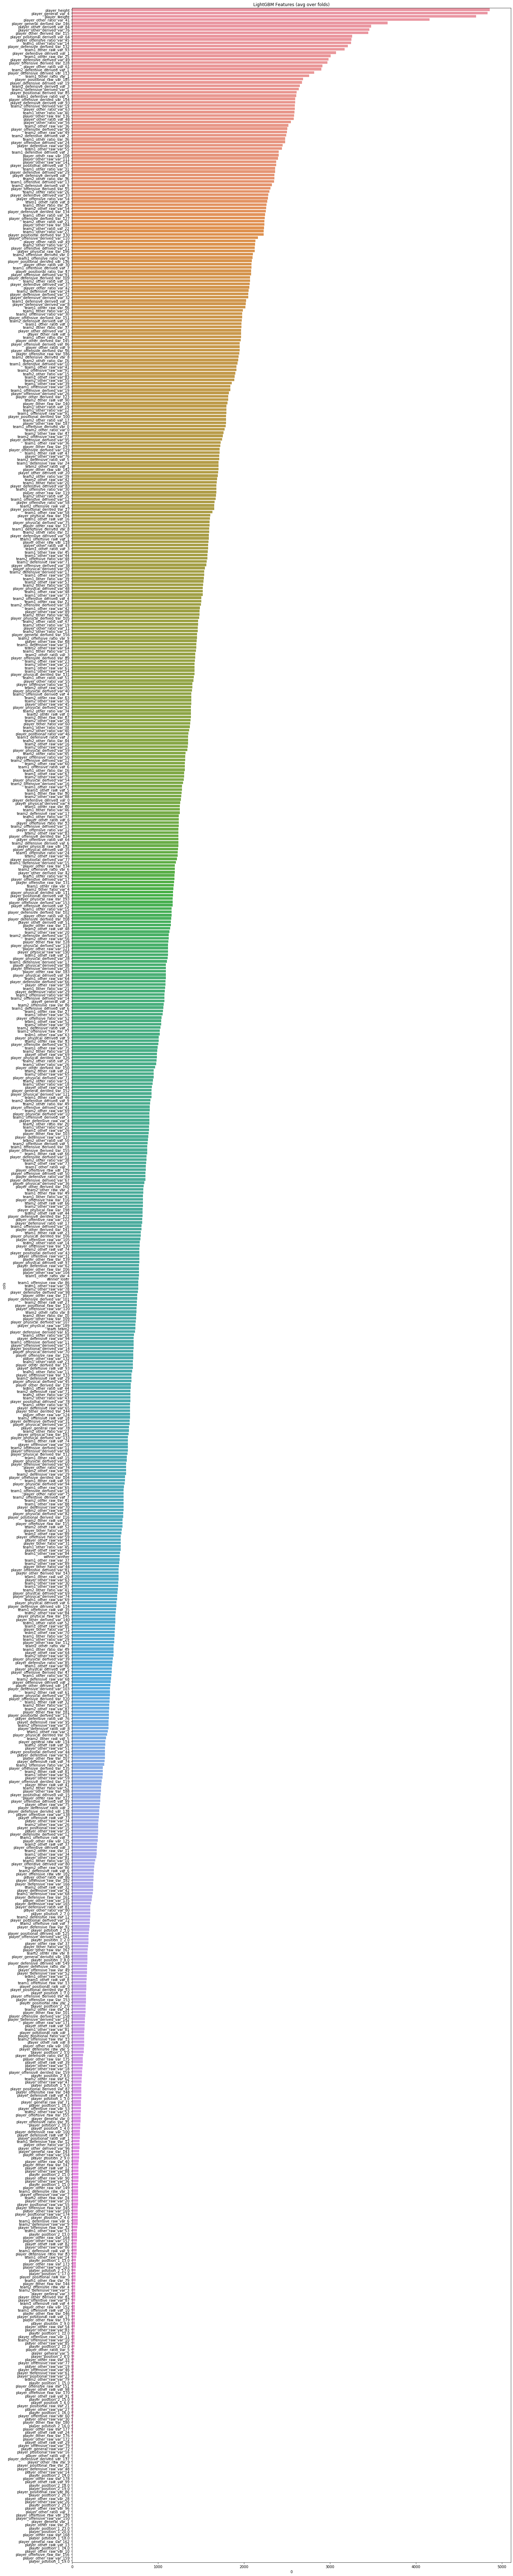

In [241]:
# feature importance
df_ft = pd.DataFrame(np.mean(np.array(feature_importance),axis=0))
df_ft['cols'] = X.columns
list(df_ft)
plt.figure(figsize=(20, 100))
sns.barplot(x=0, y="cols", data=df_ft.sort_values(by=0, ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

## Reading the test dataset

In [242]:
df_test = pd.read_csv('test.csv')

In [243]:
df_test.shape

(8774, 799)

In [244]:
df_test[(df_test['player_position_2'].isnull()) | (df_test['player_position_1'].isnull())]['competitionId'].unique()

array([14.,  7.,  9., 11.])

In [245]:
df_test[list(set(cols)-set(['rating_num']))].isnull().sum()

winner                 0
row_id                 0
player_weight         37
competitionId          1
player_position_2     75
team                   1
player_height         32
team1_system_id      404
scout_id               0
team2_system_id      416
player_position_1     75
dtype: int64

In [246]:
df_test.loc[(df_test['team'].isnull()),'team'] = df_test['team'].mode()[0]

In [247]:
df_test_ = df_test.copy()

In [248]:
df_test_.competitionId.value_counts()

4.0     1285
7.0     1257
8.0     1212
9.0     1110
11.0     986
5.0      939
10.0     908
6.0      768
14.0     243
15.0      65
Name: competitionId, dtype: int64

In [249]:
# df_test.loc[(df_test['team'].isnull()),'team'] = df_test['team'].mode()[0]

In [250]:
# df_test.loc[(df_test['competitionId'].isnull()),'competitionId'] = df_test['competitionId'].mode()[0]

In [251]:
df_test_null_position = df_test_[(df_test_.player_position_1.isnull()) | (df_test_.player_position_2.isnull())]

In [252]:
df_test_null_position.shape

(75, 799)

In [253]:
df_test_ = df_test_[~((df_test_.player_position_1.isnull()) | (df_test_.player_position_2.isnull()))]

In [254]:
df_test_.shape

(8699, 799)

In [255]:
df_x = df_test_null_position.merge(df_position_1, on =['winner','team','competitionId'], how='left')
df_x.head()

,row_id,scout_id,winner,team,competitionId,player_position_1_x,player_position_2,player_height,player_weight,player_general_var_0,...,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19,player_position_1_y
0,3782,14,draw,team1,14.0,NaN,NaN,0.609756,0.44,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1,25265,14,draw,team2,14.0,NaN,NaN,0.341463,0.26,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
2,24284,14,loser,team1,14.0,NaN,NaN,0.365854,0.38,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
3,14366,14,winner,team2,14.0,NaN,NaN,0.341463,0.26,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
4,14312,10,loser,team2,14.0,NaN,NaN,0.512195,0.46,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [256]:
df_y = df_x.merge(df_position_2, on =['winner','team','competitionId'], how='left')
df_y

,row_id,scout_id,winner,team,competitionId,player_position_1_x,player_position_2_x,player_height,player_weight,player_general_var_0,...,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19,player_position_1_y,player_position_2_y
0,3782,14,draw,team1,14.0,NaN,NaN,0.609756,0.44,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
1,25265,14,draw,team2,14.0,NaN,NaN,0.341463,0.26,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.0
2,24284,14,loser,team1,14.0,NaN,NaN,0.365854,0.38,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0
3,14366,14,winner,team2,14.0,NaN,NaN,0.341463,0.26,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.0
4,14312,10,loser,team2,14.0,NaN,NaN,0.512195,0.46,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,22231,14,loser,team1,14.0,NaN,NaN,0.512195,0.54,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0
71,22286,11,winner,team1,14.0,NaN,NaN,0.268293,0.36,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
72,27218,14,draw,team2,14.0,NaN,NaN,0.439024,0.52,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.0
73,25953,14,loser,team2,14.0,NaN,NaN,0.317073,0.34,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0


In [257]:
df_y.drop(columns=['player_position_1_x','player_position_2_x'], axis =1, inplace=True)
df_y.rename(columns= {'player_position_1_y':'player_position_1','player_position_2_y':'player_position_2'},inplace=True)

In [258]:
df_y = df_y[list(df_test_.columns)]

In [259]:
df_y

,row_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,3782,14,draw,team1,14.0,4.0,4.0,0.609756,0.44,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25265,14,draw,team2,14.0,17.0,17.0,0.341463,0.26,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24284,14,loser,team1,14.0,8.0,8.0,0.365854,0.38,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14366,14,winner,team2,14.0,17.0,17.0,0.341463,0.26,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14312,10,loser,team2,14.0,3.0,2.0,0.512195,0.46,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,22231,14,loser,team1,14.0,8.0,8.0,0.512195,0.54,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,22286,11,winner,team1,14.0,4.0,4.0,0.268293,0.36,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,27218,14,draw,team2,14.0,17.0,17.0,0.439024,0.52,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,25953,14,loser,team2,14.0,3.0,2.0,0.317073,0.34,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
df_test_=pd.concat([df_test_,df_y])

In [261]:
df_test_.shape

(8774, 799)

In [262]:
df_test_[list(set(cols)-set(['rating_num']))].isnull().sum()

winner                 0
row_id                 0
player_weight         37
competitionId          1
player_position_2      0
team                   0
player_height         32
team1_system_id      404
scout_id               0
team2_system_id      416
player_position_1      0
dtype: int64

In [263]:
# replacing the null values with mean of 'player_height' column for each unique value in rating_num

for i in df_test_.player_position_2.unique():
    df_test_.loc[(df_test_['player_position_2']==i) & (df_test_['player_height'].isnull()),'player_height'] = df_test_[df_test_['player_position_2']==i]['player_height'].mean()

In [264]:
# replacing the null values with mean of 'player_weight' column for each unique value in rating_num

for i in df_test_.player_position_2.unique():
    df_test_.loc[(df_test_['player_position_2']==i) & (df_test_['player_weight'].isnull()),'player_weight'] = df_test_[df_test_['player_position_2']==i]['player_weight'].mean()

In [265]:
df_test1 = df_test_[list(set(list(df_test_.columns))-set(rem_col))]

In [266]:
# filling the remaining null values with 0
df_test1 = df_test1.fillna(0)

In [267]:
# dropping the following columns - scout_id, team1_system_id, team2_system_id
df_test1.drop(columns=['scout_id','team1_system_id','team2_system_id'],axis=1, inplace=True)

In [268]:
# list of categorical columns
cat_cols = ['winner','team','competitionId','player_position_1',
 'player_position_2']

In [269]:
# converting the categorical columns to string
for i in cat_cols :
    df_test1[i]=df_test1[i].astype(str)

In [270]:
# dummify the categorical variables
df_test2 = pd.get_dummies(df_test1,columns = cat_cols, drop_first=True)

In [271]:
df_test2

,team1_offensive_derived_var_7,team2_other_ratio_var_23,team1_other_raw_var_39,team2_other_raw_var_34,team2_other_raw_var_85,player_other_raw_var_12,team1_other_raw_var_83,team1_other_raw_var_53,team1_other_raw_var_67,team2_offensive_derived_var_7,...,player_position_2_20.0,player_position_2_21.0,player_position_2_23.0,player_position_2_3.0,player_position_2_4.0,player_position_2_5.0,player_position_2_6.0,player_position_2_7.0,player_position_2_8.0,player_position_2_9.0
0,0.127487,0.238667,0.343590,0.000000,0.117647,0.0,0.398629,0.0,0.325301,0.000000,...,0,0,0,0,1,0,0,0,0,0
1,0.000000,0.409333,0.244444,0.000000,0.235294,0.0,0.476011,0.0,0.481928,0.113091,...,0,0,0,0,0,0,0,0,0,0
2,0.114582,0.448000,0.297436,0.142857,0.235294,0.0,0.378510,0.0,0.506024,0.114582,...,0,0,0,0,0,0,0,0,0,0
3,0.113994,0.390667,0.360684,0.714286,0.411765,0.0,0.348662,0.2,0.421687,0.231990,...,0,0,0,0,0,0,0,0,0,1
4,0.120925,0.577333,0.220513,0.000000,0.058824,0.0,0.390891,0.0,0.554217,0.120925,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
71,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
72,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
73,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [272]:
# drop row_id column
df_test2.drop(columns=['row_id'],axis=1,inplace=True)

In [273]:
df_test2.shape

(8774, 785)

In [274]:
X.shape

(20453, 773)

In [275]:
df_test2[list(X.columns)]

,team1_offensive_derived_var_7,team2_other_ratio_var_23,team1_other_raw_var_39,team2_other_raw_var_34,team2_other_raw_var_85,player_other_raw_var_12,team1_other_raw_var_83,team1_other_raw_var_53,team1_other_raw_var_67,team2_offensive_derived_var_7,...,player_position_2_2.0,player_position_2_20.0,player_position_2_23.0,player_position_2_3.0,player_position_2_4.0,player_position_2_5.0,player_position_2_6.0,player_position_2_7.0,player_position_2_8.0,player_position_2_9.0
0,0.127487,0.238667,0.343590,0.000000,0.117647,0.0,0.398629,0.0,0.325301,0.000000,...,0,0,0,0,1,0,0,0,0,0
1,0.000000,0.409333,0.244444,0.000000,0.235294,0.0,0.476011,0.0,0.481928,0.113091,...,0,0,0,0,0,0,0,0,0,0
2,0.114582,0.448000,0.297436,0.142857,0.235294,0.0,0.378510,0.0,0.506024,0.114582,...,0,0,0,0,0,0,0,0,0,0
3,0.113994,0.390667,0.360684,0.714286,0.411765,0.0,0.348662,0.2,0.421687,0.231990,...,0,0,0,0,0,0,0,0,0,1
4,0.120925,0.577333,0.220513,0.000000,0.058824,0.0,0.390891,0.0,0.554217,0.120925,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
71,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
72,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
73,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0


In [276]:
# final_cols = list(set(l1)-set(drop_cols))
# df_test3 = df_test2[final_cols]

In [278]:
df_test3 = df_test2[list(X.columns)].copy()

In [280]:
y_predict_gbm = gbm.predict(df_test3)
y_predict_gbm

array([6.01688238, 4.88966857, 5.7267242 , ..., 6.52760398, 6.71476142,
       7.34276268])

In [290]:
final_gbm_df = pd.DataFrame({'row_id':df_test_['row_id'],'rating_num': y_predict_gbm})
final_gbm_df.to_csv('results_gbm.csv',index=False)

In [281]:
y_predict = xgb_r.predict(df_test3)

In [283]:
y_predict

array([7.2687635, 4.3659024, 5.6786604, ..., 5.468104 , 6.795146 ,
       7.3081384], dtype=float32)

In [285]:
y_fin = y_predict.copy()

In [286]:
y_fin

array([7.2687635, 4.3659024, 5.6786604, ..., 5.468104 , 6.795146 ,
       7.3081384], dtype=float32)

In [287]:
fin_df = pd.DataFrame({'row_id':df_test_['row_id'],'rating_num': y_fin})

In [288]:
f